<a href="https://colab.research.google.com/github/utkarshupadhyay-17/Cat-and-Dog-classification-using-CNN/blob/main/cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [ ]:
#import required lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
# load data
# Loading training data

train_data=keras.utils.image_dataset_from_directory(
    directory="/content/dogs-vs-cats/train",
    labels="inferred",    # cats # dogs
    label_mode="int",     # 0 # 1
    batch_size=32,        # images per batch
    image_size=(256,256) # resize all images
)

test_data=keras.utils.image_dataset_from_directory(
    directory="/content/dogs-vs-cats/test",
    labels="inferred",    # cats # dogs
    label_mode="int",     # 0 # 1
    batch_size=32,        # images per batch
    image_size=(256,256) # resize all images
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalize data   0-255   ---->0,1
def process(image,label):
  image=tf.cast(image/255.0,tf.float32) # normalizing data
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [ ]:
# Building CNN Model
model=Sequential()    # creating a seq model (layer by layer)

# detect pattern: line, edge, shape
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
#max pool 2d : reduce img size and retraun the strong feature
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# 2nd layer
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# 3rd layer
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())   # convert 2d --> 1d
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# train the model
history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9745 - loss: 0.0768 - val_accuracy: 0.7964 - val_loss: 0.9276
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 73ms/step - accuracy: 0.9804 - loss: 0.0665 - val_accuracy: 0.7942 - val_loss: 0.9601
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.8008 - val_loss: 1.0206
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9857 - loss: 0.0415 - val_accuracy: 0.7972 - val_loss: 1.1434
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9881 - loss: 0.0323 - val_accuracy: 0.7948 - val_loss: 1.0077
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.7946 - val_loss: 1.0333
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.7892 - val_loss: 1.2289
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9906 - loss: 0.0299 - 

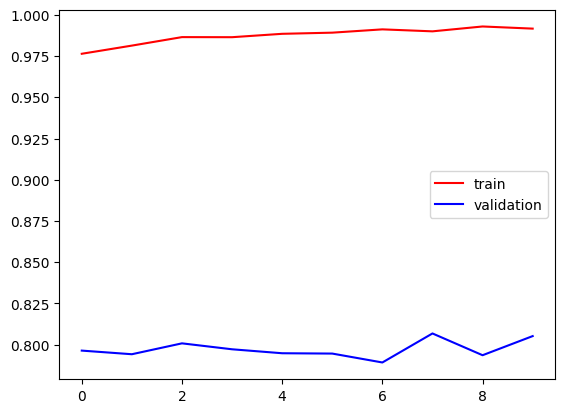

In [ ]:
#plot the accuracy and loss
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()


In [ ]:
#predict cat and dog
img_path="/content/dogs-vs-cats/train/dogs/dog.87.jpg"
img=keras.utils.load_img(img_path,target_size=(256,256))

# convert to numy array
img_array=keras.utils.img_to_array(img)

#normalize 0-255 0-1
img_arr=img_array/255.0

#expand dim to convert to batch image
img_arr=np.expand_dims(img_arr,axis=0)

#predict
pred=model.predict(img_arr)

# 1-0
pred_class= 1 if pred>0.5 else 0
print(pred_class)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1
[[0.6282296]]


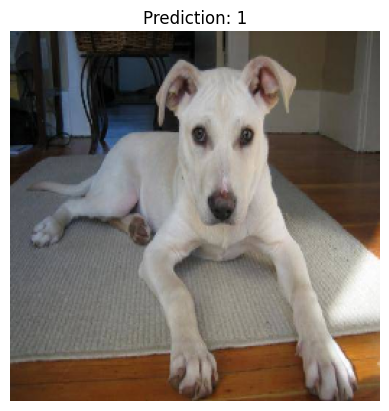

In [ ]:
plt.imshow(img)
plt.axis('off') # remove grid line
plt.title(f"Prediction: {pred_class}")
plt.show()

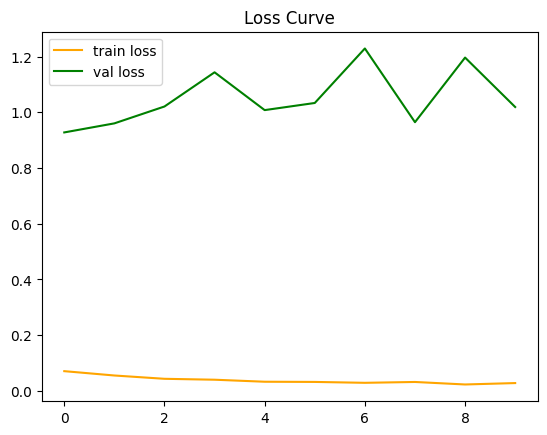

In [ ]:
plt.plot(history.history["loss"], color="orange", label="train loss")
plt.plot(history.history["val_loss"], color="green", label="val loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Cat 🐱 (100.00% confidence)


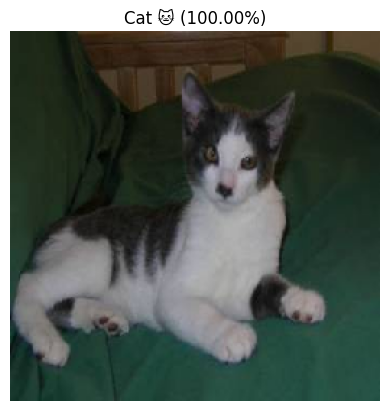

In [ ]:
img_path = "/content/dogs-vs-cats/train/cats/cat.123.jpg"  # or any image path
img = keras.utils.load_img(img_path, target_size=(256, 256))
img_array = keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
pred = model.predict(img_array)[0][0]

# Decision threshold
threshold = 0.85  # You can tune this value

if pred > threshold:
    label = "Dog 🐶"
    confidence = pred
elif pred < (1 - threshold):
    label = "Cat 🐱"
    confidence = 1 - pred
else:
    label = "Unknown ❓ (Not a cat or dog)"
    confidence = max(pred, 1 - pred)

# Output
print(f"{label} ({confidence*100:.2f}% confidence)")

# Plot
plt.imshow(img)
plt.axis('off')
plt.title(f"{label} ({confidence*100:.2f}%)")
plt.show()


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
from PIL import Image

def classify_image(image):
    img = image.resize((256, 256))
    img_array = keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    threshold = 0.85  # For detecting unknown inputs

    if pred > threshold:
        label = "Dog 🐶"
        confidence = pred
    elif pred < (1 - threshold):
        label = "Cat 🐱"
        confidence = 1 - pred
    else:
        label = "Unknown ❓ (Not a cat or dog)"
        confidence = max(pred, 1 - pred)

    return f"{label} ({confidence * 100:.2f}% confident)"


In [ ]:
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload a Cat/Dog Image"),
    outputs=gr.Textbox(label="Prediction Result"),
    title="🐾 Cat vs Dog Classifier",
    description="Upload an image of a cat or dog. The model will classify it. Non-cat/dog images will show 'Unknown'."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d10fc4d6c2c1be3c24.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
